In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CARREGAMENTO DE DADOS

url = "http://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv"
df = pd.read_csv(url)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# TRANFORMAÇÃO DOS DADOS

# Avalia se há dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

# Elimina as observações com dados ausentes, se existirem
len_before_cleaning = len(df)
df_clean = df.dropna()
len_after_cleaning = len(df_clean)
removed_observations = len_before_cleaning - len_after_cleaning
print(f"\nObservações eliminadas: {removed_observations}")

# Recodifica variável alvo: 1 (Horeca) -> 1, 2 (Retail) -> 0
df_clean['Channel'] = df_clean['Channel'].map({1: 1, 2: 0})
print("\nDistribuição da variável alvo recodificada:")
print("Horeca (1):", (df_clean['Channel'] == 1).sum())
print("Retail (0):", (df_clean['Channel'] == 0).sum())

Dados ausentes por coluna:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Observações eliminadas: 0

Distribuição da variável alvo recodificada:
1 (Horeca): 298
0 (Retail): 142


In [13]:
# PREPARAÇÃO DE DADOS PARA MODELAGEM

# Separa em target (Channel) e features (Outras colunas)
X = df_clean.drop(['Channel'], axis=1)
y = df_clean['Channel']

# Separa o dataframe em Treino-Teste (75-25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


MODELO RANDOM FOREST:

Métricas:
Acurácia: 0.9091
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333


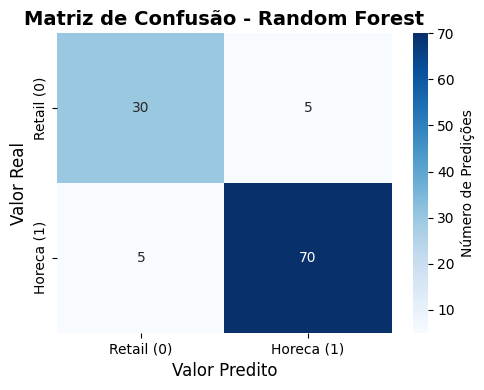

In [ ]:
# MODELO RANDOM FOREST

print("MODELO RANDOM FOREST:")

# Treina o Random Forest com opções padrão do classificador
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realiza as predições
y_pred_rf = rf_model.predict(X_test)

# Métricas Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("\nMétricas:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Retail (0)', 'Horeca (1)'], 
            yticklabels=['Retail (0)', 'Horeca (1)'],
            cbar_kws={'label': 'Número de Predições'})
plt.title('Matriz de Confusão - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

MODELO XGBOOST:

Métricas:
Acurácia: 0.9000
Precision: 0.9211
Recall: 0.9333
F1-Score: 0.9272


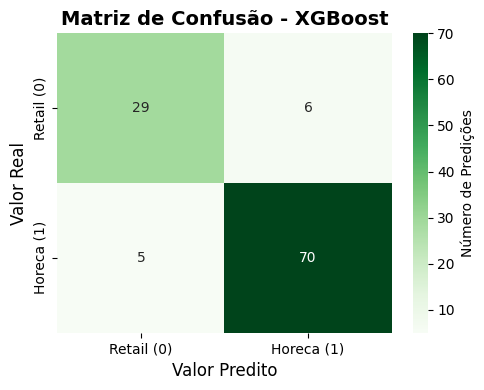

In [33]:
# MODELO XGBOOST

print("MODELO XGBOOST:")

# Treina O XGBoost utilizando configurações padrão do modelo
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Realiza as predições
y_pred_xgb = xgb_model.predict(X_test)

# Métricas XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

print("\nMétricas:")
print(f"Acurácia: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")

plt.figure(figsize=(5, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Retail (0)', 'Horeca (1)'], 
            yticklabels=['Retail (0)', 'Horeca (1)'],
            cbar_kws={'label': 'Número de Predições'})
plt.title('Matriz de Confusão - XGBoost', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
# COMPARAÇÃO DOS MODELOS

print("Comparação dos modelos:")

comparison_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

comparison_df['Diferença (RF - XGB)'] = comparison_df['Random Forest'] - comparison_df['XGBoost']

comparison_df.round(4)

Comparação dos modelos:


,Métrica,Random Forest,XGBoost,Diferença (RF - XGB)
0,Acurácia,0.9091,0.9000,0.0091
1,Precision,0.9333,0.9211,0.0123
2,Recall,0.9333,0.9333,0.0000
3,F1-Score,0.9333,0.9272,0.0062
